In [56]:
import pandas as pd
import numpy as np

# Prepare Data

In [57]:
df = pd.read_csv('salary-job-data.csv')

In [58]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [59]:
# lower case the columns and replace whitespace with underscores.
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,age,gender,education_level,job_title,years_of_experience,salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [60]:
df.dtypes

age                    float64
gender                  object
education_level         object
job_title               object
years_of_experience    float64
salary                 float64
dtype: object

In [61]:
df = df.dropna()

# check the shape to confirm how many rows remain
print(df.shape)

# (optional) confirm there are no missing values
print(df.isnull().sum())

(373, 6)
age                    0
gender                 0
education_level        0
job_title              0
years_of_experience    0
salary                 0
dtype: int64


In [62]:
# isolate the columns containing strings
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['gender', 'education_level', 'job_title']

In [63]:
# now all strings should be lower and camel cased
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.head()

,age,gender,education_level,job_title,years_of_experience,salary
0,32.0,male,bachelor's,software_engineer,5.0,90000.0
1,28.0,female,master's,data_analyst,3.0,65000.0
2,45.0,male,phd,senior_manager,15.0,150000.0
3,36.0,female,bachelor's,sales_associate,7.0,60000.0
4,52.0,male,master's,director,20.0,200000.0


# EDA

In [64]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

age
[32. 28. 45. 36. 52.]
31

gender
['male' 'female']
2

education_level
["bachelor's" "master's" 'phd']
3

job_title
['software_engineer' 'data_analyst' 'senior_manager' 'sales_associate'
 'director']
174

years_of_experience
[ 5.  3. 15.  7. 20.]
28

salary
[ 90000.  65000. 150000.  60000. 200000.]
36



In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='salary', ylabel='Count'>

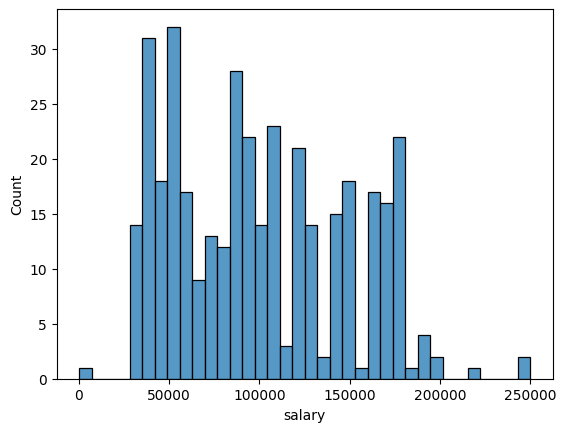

In [66]:
# plot the count of salaries in the data set
sns.histplot(df.salary, bins=36)

In [67]:
df.head()

,age,gender,education_level,job_title,years_of_experience,salary
0,32.0,male,bachelor's,software_engineer,5.0,90000.0
1,28.0,female,master's,data_analyst,3.0,65000.0
2,45.0,male,phd,senior_manager,15.0,150000.0
3,36.0,female,bachelor's,sales_associate,7.0,60000.0
4,52.0,male,master's,director,20.0,200000.0


In [68]:
# mean salary for females
salary_female = df[df.gender == 'female'].salary.mean()
salary_female = round(salary_female, 2)

In [69]:
# mean salary for males
salary_male = df[df.gender == 'male'].salary.mean()
salary_male = round(salary_male, 2)

In [87]:
f'The mean salary of females: ${salary_female}', f'the mean salary of males: ${salary_male}'

('The mean salary of females: $97011.17',
 'the mean salary of males: $103867.78')

In [89]:
print(df.groupby('gender')['salary'].describe())

        count           mean           std      min      25%      50%  \
gender                                                                  
female  179.0   97011.173184  45916.141054  35000.0  50000.0  90000.0   
male    194.0  103867.783505  50182.461438    350.0  60000.0  97500.0   

             75%       max  
gender                      
female  140000.0  190000.0  
male    140000.0  250000.0  


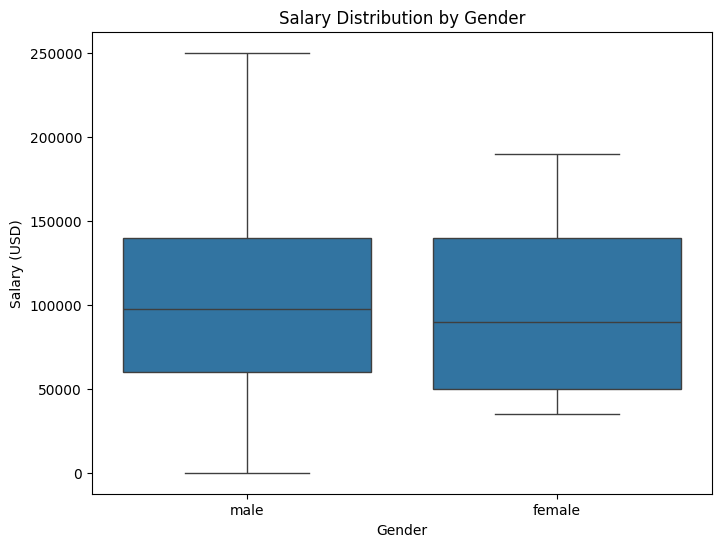

In [90]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='salary', data=df)
plt.title('Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary (USD)')
plt.show()

# Feature Importance

In [71]:
from sklearn.metrics import mutual_info_score

In [72]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df.salary)

In [73]:
categorical = ['gender', 'education_level', 'job_title']

In [74]:
mi = df[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

job_title          2.565475
education_level    0.454428
gender             0.084725
dtype: float64

In [98]:
top_titles = df['job_title'].value_counts().head(10).index
df_top = df[df['job_title'].isin(top_titles)]

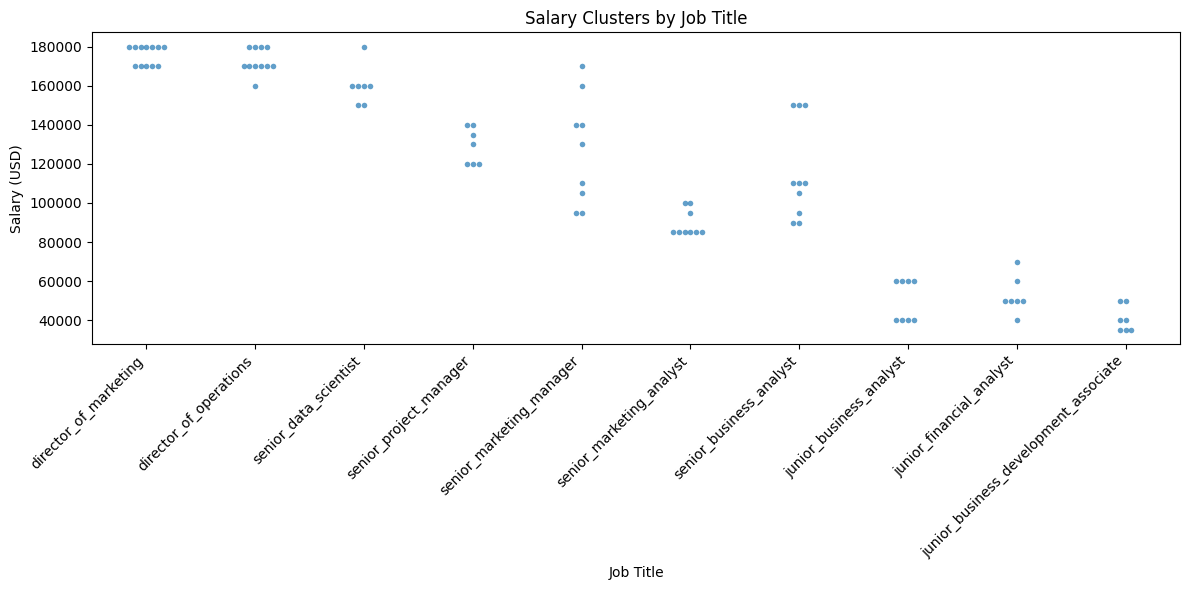

In [99]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='job_title', y='salary', data=df_top, size=4, alpha=0.7)
plt.title('Salary Clusters by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [75]:
# where do we have null values and how many are there?
df.isnull().sum()

age                    0
gender                 0
education_level        0
job_title              0
years_of_experience    0
salary                 0
dtype: int64

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [78]:
len(df_full_train), len(df_test)

(298, 75)

In [79]:
df_train, df_val =  train_test_split(df_full_train, test_size=0.25, random_state=1)

In [80]:
len(df_train), len(df_test), len(df_val)

(223, 75, 75)

In [81]:
df_train = df_train.reset_index(drop=True)
df_val = df_train.reset_index(drop=True)
df_test = df_train.reset_index(drop=True)

In [82]:
y_train = df_train.salary.values
y_val = df_val.salary.values
y_test = df_test.salary.values

In [83]:
del df_train['salary']
del df_val['salary']
del df_test['salary']

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
# need to handle categorical variables with dict vectorizer next

In [86]:
model = LinearRegression()
model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
model.predict(X_train)

In [ ]:
model.predict_proba(X_train)

In [ ]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred